# Credit Score

In this project we will evaluate a credit score classifier using machine learning algorithms, where the aim is to classify good borrowers and bad borrowers.

Technologies used:

- Pandas
- Seaborn
- Numpy
- Matplotlib
- Sklearn
- Plotly
- Scipy
- pickle

In [1]:
# Import Libraries 
import numpy as np
np.set_printoptions(threshold=10000,suppress= True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
# Import Database
data = pd.read_csv('credit_scoring.csv', sep=";", header=0)
data_array = data.values
print(data)

      Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0           9.0   1.0  60.0  30.0      0.0      1.0  1.0      73.0   129.0   
1          17.0   1.0  60.0  58.0      1.0      1.0  0.0      48.0   131.0   
2          10.0   0.0  36.0  46.0      0.0      2.0  1.0      90.0   200.0   
3           0.0   1.0  60.0  24.0      1.0      1.0  0.0      63.0   182.0   
4           0.0   1.0  36.0  26.0      1.0      1.0  0.0      46.0   107.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
4370        1.0   1.0  60.0  39.0      0.0      1.0  0.0      69.0    92.0   
4371       22.0   0.0  60.0  46.0      0.0      1.0  0.0      60.0    75.0   
4372        0.0   0.0  24.0  37.0      0.0      1.0  1.0      60.0    90.0   
4373        0.0   1.0  48.0  23.0      1.0      1.0  1.0      49.0   140.0   
4374        5.0   0.0  60.0  32.0      0.0      1.0  1.0      60.0   140.0   

      Assets    Debt  Amount   Price  Status  
0        0.0    

In [3]:
X = data.iloc[:, :13].values
Y = data.iloc[:, 13].values
col_name = data.columns.values
feature_name = data.columns.values[:13]
print(feature_name)

['Seniority' 'Home' 'Time' 'Age' 'Marital' 'Records' 'Job' 'Expenses'
 'Income' 'Assets' 'Debt' 'Amount' 'Price']


Size of samples : 4375
Percent of bad payer : 0.27794285714285716
Percent of good payer : 0.7220571428571428


(array([1216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

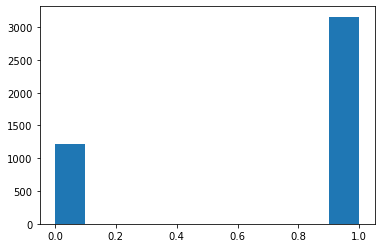

In [4]:
print("Size of samples : {}".format(len(Y)))
print("Percent of bad payer : {}".format(sum(Y == 0)/len(data.Status)))
print("Percent of good payer : {}".format(sum(Y==1)/len(data.Status)))
plt.hist(Y)

In [5]:
# import ProfileReport
from pandas_profiling import ProfileReport

In [6]:
# executing profile
profile = ProfileReport(data, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [7]:
profile

In [8]:
# save the report on disk
profile.to_file(output_file="Data_Report.html")

In [7]:
# Descriptive statistics
data.describe()

Seniority         Home         Time          Age      Marital  \
count  4375.000000  4375.000000  4375.000000  4375.000000  4375.000000   
mean      7.985143     0.528229    46.518857    37.021714     0.271086   
std       8.173922     0.499260    14.619282    10.973187     0.444571   
min       0.000000     0.000000     6.000000    18.000000     0.000000   
25%       2.000000     0.000000    36.000000    28.000000     0.000000   
50%       5.000000     1.000000    48.000000    36.000000     0.000000   
75%      12.000000     1.000000    60.000000    45.000000     1.000000   
max      48.000000     1.000000    72.000000    68.000000     1.000000   

           Records          Job     Expenses       Income         Assets  \
count  4375.000000  4375.000000  4375.000000  4375.000000    4375.000000   
mean      1.172114     0.364114    55.595200   130.848914    5298.431314   
std       0.377523     0.481236    19.451569    86.199518   10582.377366   
min       1.000000     0.000000    35.000000     0.000000       0.000000   
25%       1.000000     0.000000    35.000000    80.000000       0.000000   
50%       1.000000     0.000000    51.000000   120.000000    3000.000000   
75%       1.000000     1.000000    72.000000   165.000000    6000.000000   
max       2.000000     1.000000   173.000000   959.000000  250000.000000   

               Debt       Amount         Price       Status  
count   4375.000000  4375.000000   4375.000000  4375.000000  
mean     342.551543  1037.463771   1459.732343     0.722057  
std     1217.622800   469.753531    621.775995     0.448036  
min        0.000000   100.000000    105.000000     0.000000  
25%        0.000000   700.000000   1116.500000     0.000000  
50%        0.000000  1000.000000   1400.000000     1.000000  
75%        0.000000  1300.000000   1688.000000     1.000000  
max    30000.000000  4500.000000  11140.000000     1.000000

In [9]:
# Calculate the correlation between features 
correlacoes = data.corr()

<AxesSubplot:>

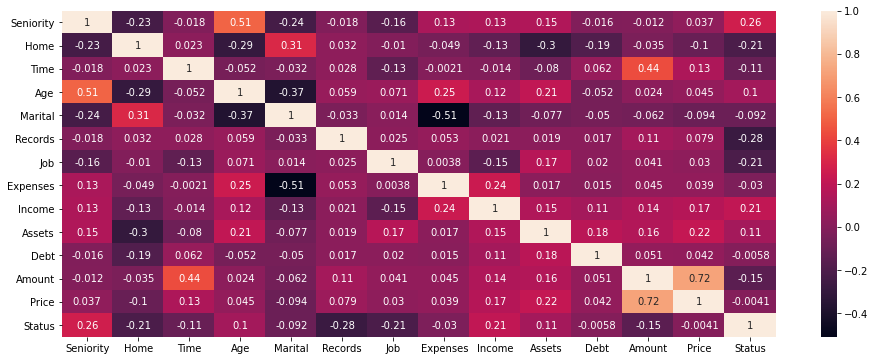

In [10]:
# Verify the correlation with a graphic ploted by seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

#### Detect Outliers

In [11]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [12]:
Outliers_to_drop = detect_outliers(data,2,["Seniority",
                                            "Home",
                                            "Time",
                                            "Age",
                                            "Marital",
                                            "Records",
                                            "Job",
                                            "Expenses",
                                            "Income",
                                            "Assets",
                                            "Debt",
                                            "Amount",
                                            "Price",
                                            "Status"])

In [13]:
data.loc[Outliers_to_drop]

Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
562        31.0   1.0  60.0  51.0      0.0      2.0  0.0     135.0   300.0   
839        30.0   0.0  36.0  56.0      0.0      2.0  1.0     105.0   300.0   
1908       30.0   0.0  24.0  51.0      0.0      2.0  1.0      45.0     0.0   
2208       35.0   0.0  60.0  52.0      0.0      1.0  1.0      45.0    90.0   
2632       30.0   0.0  60.0  61.0      0.0      2.0  1.0      35.0     0.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
3999       12.0   0.0  60.0  56.0      0.0      1.0  1.0      35.0   126.0   
4049        2.0   0.0  36.0  34.0      0.0      1.0  0.0      60.0   125.0   
4291        5.0   0.0  36.0  34.0      0.0      1.0  0.0      45.0   137.0   
4308        7.0   0.0  60.0  28.0      0.0      1.0  0.0      45.0    88.0   
762         4.0   0.0   6.0  42.0      0.0      1.0  0.0      45.0   275.0   

       Assets    Debt  Amount   Price  Status  
562       0.0     0.0  1000.0  1380.0       1  
839   30000.0  1300.0  1100.0  1318.0       1  
1908  20000.0     0.0  1000.0  1588.0       1  
2208  14000.0     0.0  2900.0  4600.0       1  
2632  60000.0     0.0   950.0  1015.0       0  
...       ...     ...     ...     ...     ...  
3999  17000.0     0.0  3000.0  3745.0       1  
4049  59000.0   900.0  1500.0  3000.0       1  
4291  20000.0     0.0  3000.0  5000.0       1  
4308  30000.0     0.0  2500.0  3415.0       1  
762    4800.0  1200.0  2400.0  3400.0       0  

[106 rows x 14 columns]

We detected 106 outliers in the dataset, which represents 2.42% of our data. We will drop these outliers.

In [14]:
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [15]:
data

Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0           9.0   1.0  60.0  30.0      0.0      1.0  1.0      73.0   129.0   
1          17.0   1.0  60.0  58.0      1.0      1.0  0.0      48.0   131.0   
2          10.0   0.0  36.0  46.0      0.0      2.0  1.0      90.0   200.0   
3           0.0   1.0  60.0  24.0      1.0      1.0  0.0      63.0   182.0   
4           0.0   1.0  36.0  26.0      1.0      1.0  0.0      46.0   107.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
4264        1.0   1.0  60.0  39.0      0.0      1.0  0.0      69.0    92.0   
4265       22.0   0.0  60.0  46.0      0.0      1.0  0.0      60.0    75.0   
4266        0.0   0.0  24.0  37.0      0.0      1.0  1.0      60.0    90.0   
4267        0.0   1.0  48.0  23.0      1.0      1.0  1.0      49.0   140.0   
4268        5.0   0.0  60.0  32.0      0.0      1.0  1.0      60.0   140.0   

      Assets    Debt  Amount   Price  Status  
0        0.0     0.0   800.0   846.0       1  
1        0.0     0.0  1000.0  1658.0       1  
2     3000.0     0.0  2000.0  2985.0       0  
3     2500.0     0.0   900.0  1325.0       1  
4        0.0     0.0   310.0   910.0       1  
...      ...     ...     ...     ...     ...  
4264     0.0     0.0   900.0  1020.0       0  
4265  3000.0   600.0   950.0  1263.0       1  
4266  3500.0     0.0   500.0   963.0       0  
4267     0.0     0.0   550.0   550.0       1  
4268  4000.0  1000.0  1350.0  1650.0       1  

[4269 rows x 14 columns]

In [16]:
X = data.iloc[:, :13].values
Y = data.iloc[:, 13].values
col_name = data.columns.values
feature_name = data.columns.values[:13]
print(feature_name)

['Seniority' 'Home' 'Time' 'Age' 'Marital' 'Records' 'Job' 'Expenses'
 'Income' 'Assets' 'Debt' 'Amount' 'Price']


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#### Classifiers

Create models using machine learning algorithms. We are going to compare the result of differents algorithms like **Decision Tree**, **KNN**, **Random Forest** , **MLP**, **Gaussian** and **AdaBoost**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [19]:
def classifier(X_train, Y_train, X_test, Y_test):
    DT = DecisionTreeClassifier(criterion='gini', random_state=1)
    DT.fit(X_train, Y_train)
    yDT=DT.predict(X_test)
    print(confusion_matrix(Y_test, yDT))
    print("Accurracy : {0:.3f}".format(accuracy_score(Y_test, yDT)))
    print("Precision : {0:.3f}".format(precision_score(Y_test, yDT)))
    #print("Accurracy égale à : {0:3f} et Precision egale a : {1:.3f}".format(accurracy_score(Y_test, yDT))
    
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train, Y_train)
    yKNN = KNN.predict(X_test)
    print()
    print(confusion_matrix(Y_test, yKNN))
    print("Accurracy : {0:.3f}".format(accuracy_score(Y_test, yKNN)))
    print("Precision : {0:.3f}".format(precision_score(Y_test, yKNN)))

In [20]:
classifier(X_train, Y_train, X_test, Y_test)

[[183 165]
 [177 756]]
Accurracy : 0.733
Precision : 0.821

[[104 244]
 [126 807]]
Accurracy : 0.711
Precision : 0.768


#### Normalization Standard Scaler

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ST = StandardScaler()
ST.fit(X_train)
Xtest_norm= ST.transform(X_test)
Xtrain_norm= ST.transform(X_train)

classifier(Xtrain_norm, Y_train, Xtest_norm, Y_test)

[[181 167]
 [178 755]]
Accurracy : 0.731
Precision : 0.819

[[167 181]
 [133 800]]
Accurracy : 0.755
Precision : 0.815


#### Normalization MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
ST = MinMaxScaler()
ST.fit(X_train)
Xtest_norm = ST.transform(X_test)
Xtrain_norm= ST.transform(X_train)

classifier(Xtrain_norm, Y_train, Xtest_norm, Y_test)

[[183 165]
 [176 757]]
Accurracy : 0.734
Precision : 0.821

[[153 195]
 [142 791]]
Accurracy : 0.737
Precision : 0.802


#### Normalization MaxABS Scaler

In [25]:
from sklearn.preprocessing import MaxAbsScaler

In [26]:
ST = MaxAbsScaler()
ST.fit(X_train)
Xtest_norm = ST.transform(X_test)
Xtrain_norm= ST.transform(X_train)

classifier(Xtrain_norm, Y_train, Xtest_norm, Y_test)

[[183 165]
 [175 758]]
Accurracy : 0.735
Precision : 0.821

[[156 192]
 [140 793]]
Accurracy : 0.741
Precision : 0.805


#### Normalization Robust Scaler

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
ST = RobustScaler()
ST.fit(X_train)
Xtest_norm = ST.transform(X_test)
Xtrain_norm= ST.transform(X_train)

classifier(Xtrain_norm, Y_train, Xtest_norm, Y_test)

[[180 168]
 [177 756]]
Accurracy : 0.731
Precision : 0.818

[[147 201]
 [113 820]]
Accurracy : 0.755
Precision : 0.803


#### Variables Selection

['Income' 'Seniority' 'Price' 'Amount' 'Age' 'Assets' 'Records' 'Expenses'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


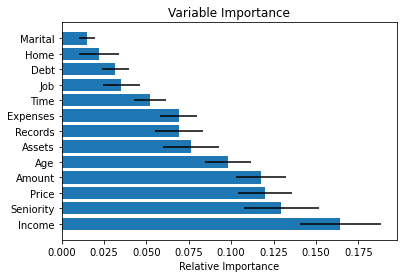

['Seniority' 'Home' 'Time' 'Age' 'Marital' 'Records' 'Job' 'Expenses'
 'Income' 'Assets' 'Debt' 'Amount' 'Price' 'Status']


In [29]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, Y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]

features = col_name
print(features[sorted_idx])
padding = np.arange(Xtrain_norm.size/len(Xtrain_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()
print(col_name)

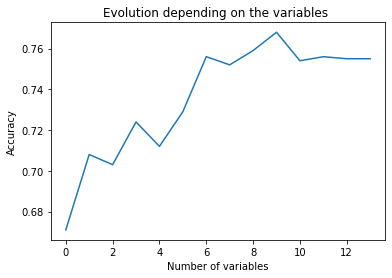

In [30]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(Xtrain_norm.shape[1]+1)
for f in np.arange(0, Xtrain_norm.shape[1]+1):
    X1_f = Xtrain_norm[:,sorted_idx[:f+1]]
    X2_f = Xtest_norm[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,Y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(Y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Number of variables")
plt.ylabel("Accuracy")
plt.title("Evolution depending on the variables ")
plt.show()

#### Optimizer the model with parameters

In [31]:
from sklearn.model_selection import GridSearchCV
parameters ={'criterion': ['entropy', 'gini'], 'max_depth':[3,4,5,None]}
model = DecisionTreeClassifier(random_state=1)
GS = GridSearchCV(model, parameters, scoring='accuracy', cv=10)
grille = GS.fit(Xtrain_norm, Y_train)
print(grille.best_params_)
print(grille.best_score_)

DT_O = grille.predict(Xtest_norm)
print("Accuracy score of DT optmized: {0:.3f}".format(accuracy_score(Y_test, DT_O)))

{'criterion': 'entropy', 'max_depth': 4}
0.7848218895198762
Accuracy score of DT optmized: 0.753


#### Pipeline Creation

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
import pickle

In [34]:
p = Pipeline([('ss', RobustScaler()),
             ('classifieur', DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=1))
             ])

p.fit(X_train, Y_train)
prediction = p.predict(X_test)
confusion_matrix(Y_test, prediction)
print("Accuracy score of DT optmized : {0:.3f}".format(accuracy_score(Y_test, prediction)))
pickle.dump(p, open("pipeline.pk1", "wb"))

Accuracy score of DT optmized : 0.751


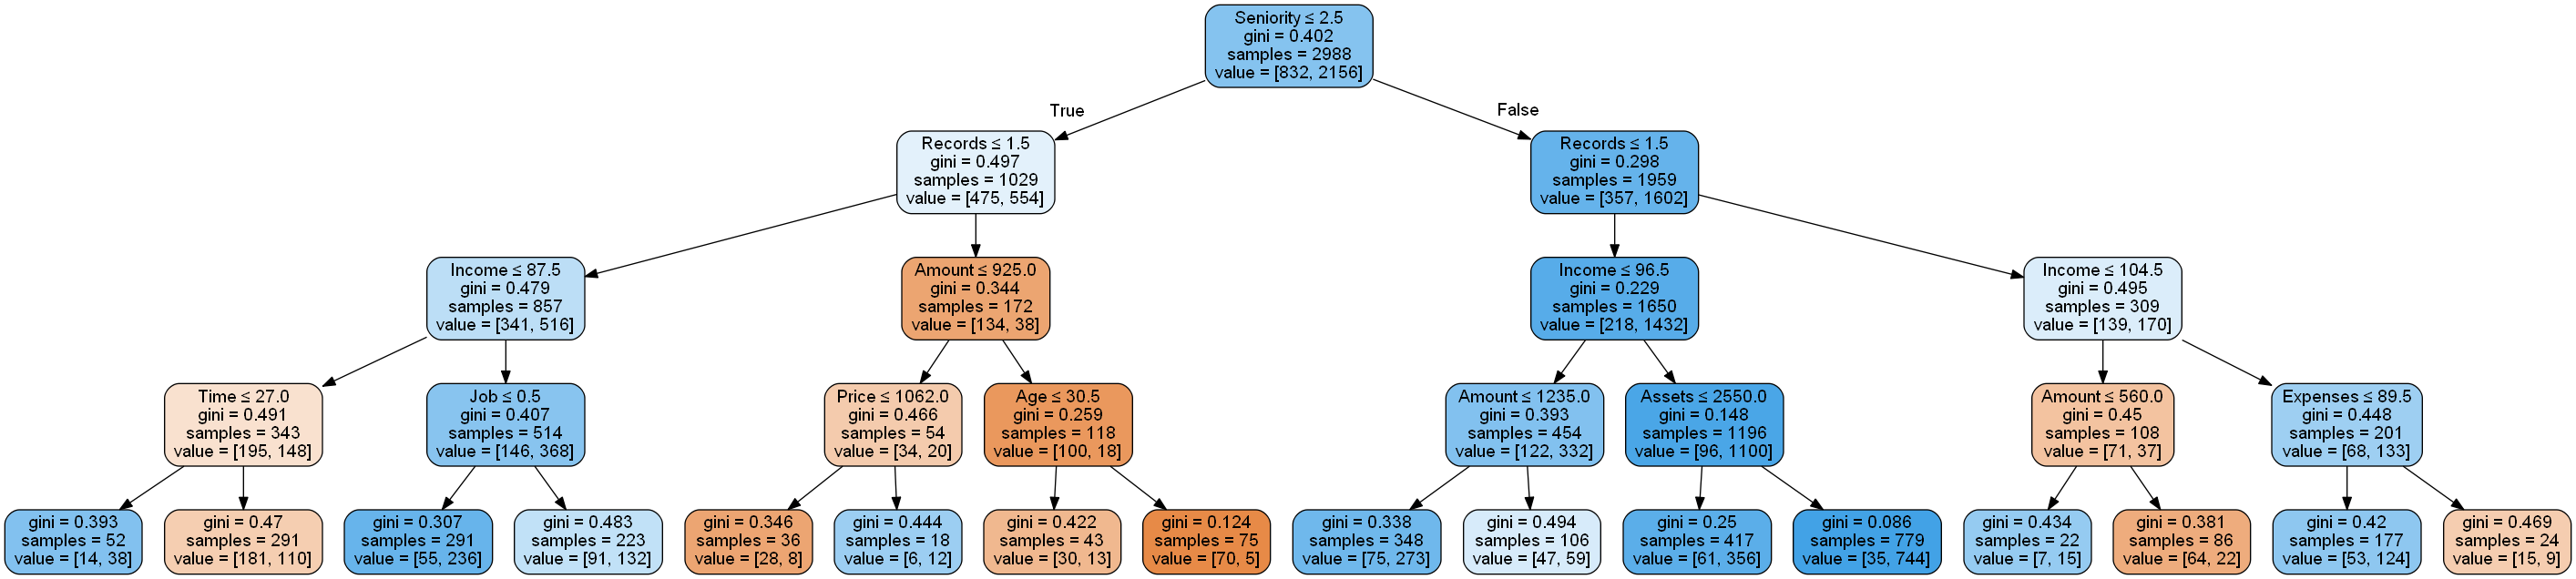

In [35]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

DT = DecisionTreeClassifier(criterion='gini', max_depth=4)
DT.fit(X_train, Y_train)
dot_data = tree.export_graphviz(DT, out_file=None, 
                               feature_names= features[:13], 
                               filled=True, rounded=True, 
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Comparison with various algorithms

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import time

In [37]:
clfs = {
    'RF': RandomForestClassifier(n_estimators=10),
    'ADA': AdaBoostClassifier(n_estimators=10),
    'BAG': BaggingClassifier(n_estimators=10),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'NB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10), alpha=0.01, max_iter=200),
    'CART': DecisionTreeClassifier(criterion='gini'),
    'IDJ': DecisionTreeClassifier(criterion='entropy'), 
    'ST': DecisionTreeClassifier(max_depth=1)    
}

In [38]:
def run_classifiers(X, Y, clsf):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    for clf_name in clfs:
        begin = time.time()
        clf = clfs[clf_name]
        cv_acc = cross_val_score(clf, X, Y, cv = kf)
        end = time.time()
        cv_prediction = cross_val_score(clf, X, Y, cv = kf, scoring='precision')
        cv_auc = cross_val_score(clf, X, Y, cv = kf, scoring='roc_auc')
        print('Accuracy for {0} is {1:3f} +/- {2:3f} in {3:2f} seconds'.format(clf_name, np.mean(cv_acc),
                                                                               np.std(cv_acc), end-begin))
        print('Precision for {0} is {1:3f} +/- {2:3f}'.format(clf_name, np.mean(cv_prediction), np.std(cv_prediction)))
        print('AUC for {0} is {1:3f} +/- {2:3f}'.format(clf_name, np.mean(cv_auc), np.std(cv_auc)))
        print()

In [39]:
run_classifiers(X, Y, clfs)

Accuracy for RF is 0.764352 +/- 0.012915 in 0.506906 seconds
Precision for RF is 0.827449 +/- 0.023149
AUC for RF is 0.789233 +/- 0.012599

Accuracy for ADA is 0.783328 +/- 0.017137 in 0.524417 seconds
Precision for ADA is 0.815036 +/- 0.016981
AUC for ADA is 0.819757 +/- 0.013776

Accuracy for BAG is 0.761779 +/- 0.018534 in 1.081843 seconds
Precision for BAG is 0.836440 +/- 0.014573
AUC for BAG is 0.790927 +/- 0.010928

Accuracy for KNN is 0.723126 +/- 0.015095 in 0.446225 seconds
Precision for KNN is 0.771970 +/- 0.017706
AUC for KNN is 0.663737 +/- 0.015647

Accuracy for NB is 0.772785 +/- 0.011125 in 0.030314 seconds
Precision for NB is 0.833260 +/- 0.015755
AUC for NB is 0.794917 +/- 0.013710

Accuracy for MLP is 0.689819 +/- 0.089526 in 10.924978 seconds
Precision for MLP is 0.821418 +/- 0.034216
AUC for MLP is 0.743776 +/- 0.029264

Accuracy for CART is 0.729214 +/- 0.014452 in 0.171112 seconds
Precision for CART is 0.819381 +/- 0.016038
AUC for CART is 0.671996 +/- 0.015368

A

In [40]:
run_classifiers(X_train,Y_train,clfs)

Accuracy for RF is 0.768072 +/- 0.022211 in 0.397299 seconds
Precision for RF is 0.832989 +/- 0.021930
AUC for RF is 0.794616 +/- 0.033475

Accuracy for ADA is 0.790162 +/- 0.016748 in 0.302343 seconds
Precision for ADA is 0.817335 +/- 0.019651
AUC for ADA is 0.823991 +/- 0.029761

Accuracy for BAG is 0.761711 +/- 0.011486 in 0.870364 seconds
Precision for BAG is 0.826684 +/- 0.026708
AUC for BAG is 0.791857 +/- 0.019914

Accuracy for KNN is 0.722213 +/- 0.017382 in 0.301877 seconds
Precision for KNN is 0.769398 +/- 0.027300
AUC for KNN is 0.680575 +/- 0.010307

Accuracy for NB is 0.776437 +/- 0.018400 in 0.029108 seconds
Precision for NB is 0.837027 +/- 0.025796
AUC for NB is 0.801632 +/- 0.029300

Accuracy for MLP is 0.726898 +/- 0.032261 in 6.644754 seconds
Precision for MLP is 0.809242 +/- 0.016438
AUC for MLP is 0.735131 +/- 0.036053

Accuracy for CART is 0.724228 +/- 0.005330 in 0.100473 seconds
Precision for CART is 0.809568 +/- 0.027287
AUC for CART is 0.654578 +/- 0.010271

Ac